# Gradient Descent Exercise

The **goal** of this exercise is to practice Gradient Descent optimisation algorithm. The task is to find parameters of a linear regression model with  gradient descent algorithm. See below more details. 

In [4]:
# import needed packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
os.listdir()

['data_ex.txt',
 'gradient_descent_linear_model.ipynb',
 '.ipynb_checkpoints',
 'gradient_descent_exercise.ipynb',
 'data_gd.csv']

In [13]:
# import data 
# ./machine_learning_geosciences/03_Optimisation/data_ex.txt 
# first column represents x, second column represnts y
df = pd.read_csv('data_ex.txt', header=None, sep=',', names=['x', 'y'])

In [15]:
# check the content of the imported data 
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='x', ylabel='y'>

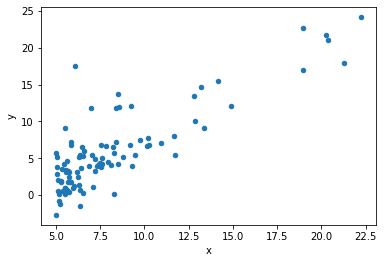

In [20]:
# plot the input data 
df.plot.scatter(x='x', y='y')

In [27]:
x = df['x']
y = df['y']

### Task: 
We want to build a regression model that we can use to predict `y` based on other `x`values. Each row in the dataset represents one specific record. 
Imagine e.g. how glacier velocity flow increases with increase of seasonal temperature. Suppose the relationship is linear, for this case of illustaration. 

### Linear regression model 

Reminder: 
$$ 
    f(x) = wx + b
$$ 

where `x` is a vector of input features;
`y` is a vector of outputs (targets), also response variable; 
`b` is the bias term (intercept), also often abbreviated as w0
`w` is the weight(s) (direction of the linear model) 

We do not know what the optimal values of w and b are and we want to learn them from data! 

**Goal**: find such values of `w` and `b` that minimize the mean squre error (the loss)! 

$$
    Loss = L = \frac{1}{N} \sum_{i=1}^{N}(y_i - (wx_i + b))^2 
$$ 


In [22]:
# define the update function of the gradient descent 
def update(x, y, w, b, alpha):
    """Update function, which returns updated parameters. 
    """
    dr_dw = 0.0
    dr_db = 0.0
    N = len(x)

    for i in range(N):
        dr_dw += -2 * x[i] * (y[i] - (w * x[i] + b))
        dr_db += -2 * (y[i] - (w * x[i] + b))

    # update w and b
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    return w, b 

In [53]:
# define gradient descent iterative function using the above defined update
# add prints of the parameters updates
# plot the gradual change of the model against the input data 


def gradient_descent(x, y, w, b, alpha, epochs):
    """Gradient descent process. 
    """
    loss_history = []
    w_history = []
    b_history = []
    counter = 0 
    
    for e in range(epochs):
        w, b = update(x, y, w, b, alpha)
        current_loss = loss(x, y, w, b) 
        loss_history.append(current_loss)
        w_history.append(w)
        b_history.append(b)
        
        # log the progress
        if (e == 0) or (e < 3000 and e % 200 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print('---')
            plt.figure(counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(x, y)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b, 'r-')
            counter += 1
    return w, b, loss_history, w_history, b_history
                

In [50]:
# define the loss function, here MSE 
def loss(x, y, w, b):
    """Loss function (MSE)  
    """
    N = len(x)

    # loss is total error 
    total_error = 0.0
    for i in range(N):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / N 

In [51]:
# define prediction model (linear)
def model(x, w, b):
    return w*x + b  

epoch:  0 loss: 48.35237113877579
w, b:  0.13065769949111344 0.01167827010309278
---
epoch:  200 loss: 11.443329855081148
w, b:  0.821572557854514 -0.19821015201448386
---
epoch:  400 loss: 11.10896892789072
w, b:  0.8474180085663059 -0.45547904363043323
---
epoch:  600 loss: 10.819517540679433
w, b:  0.8714651892921721 -0.69484772792308
---
epoch:  800 loss: 10.56894368845772
w, b:  0.8938392197283541 -0.9175616622044389
---
epoch:  1000 loss: 10.352025552316942
w, b:  0.9146565140160264 -1.1247796475881902
---
epoch:  1200 loss: 10.164242679644522
w, b:  0.934025386454796 -1.3175798583386071
---
epoch:  1400 loss: 10.00168178042021
w, b:  0.9520466150719794 -1.496965451710564
---
epoch:  1600 loss: 9.860955176441186
w, b:  0.9688139659799611 -1.663869787469122
---
epoch:  1800 loss: 9.739130204003354
w, b:  0.9844146812499137 -1.819161284246371
---
epoch:  2000 loss: 9.633668098830338
w, b:  0.9989299328403289 -1.9636479380035448
---
epoch:  2200 loss: 9.542371089646107
w, b:  1.0124

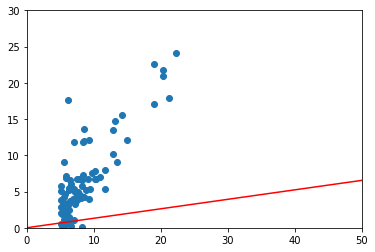

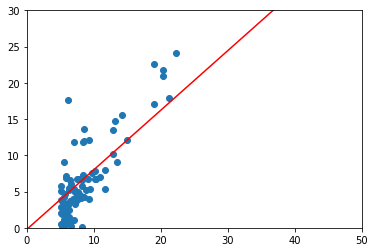

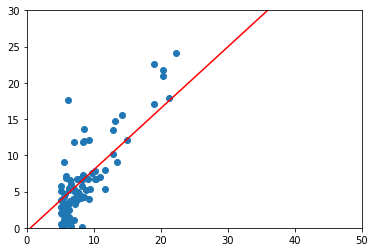

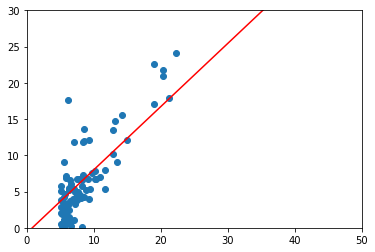

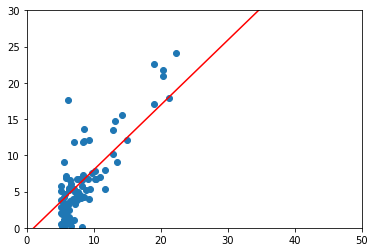

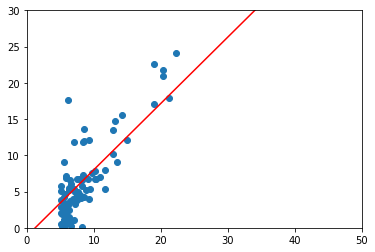

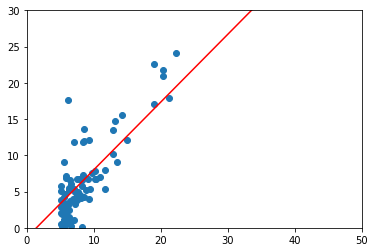

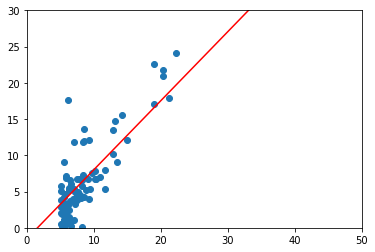

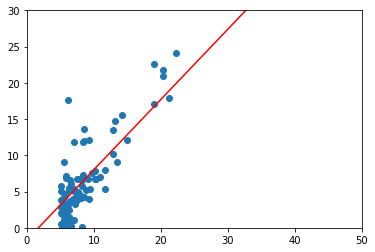

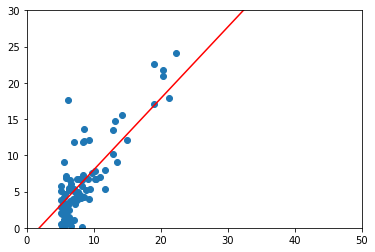

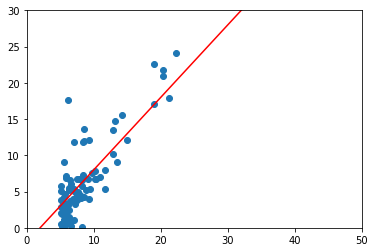

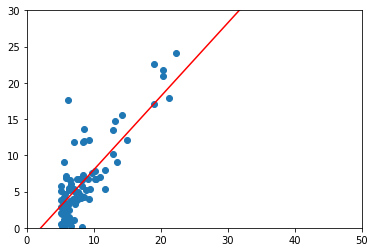

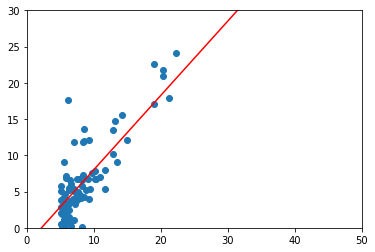

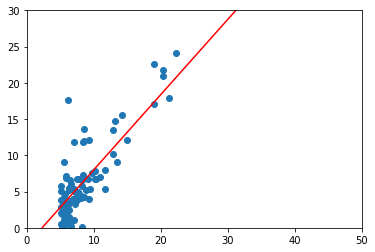

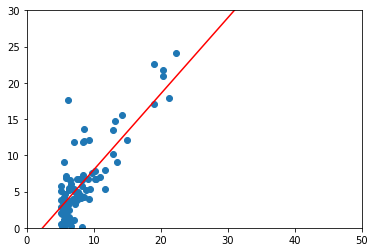

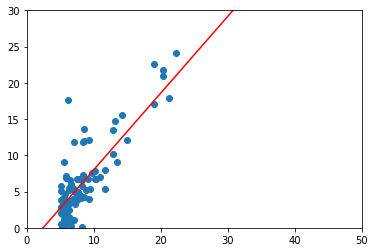

In [64]:
# select inital parameters and train the model 
w = 0.0
b = 0.0 
alpha = 0.001 
epoches = 5000

w, b, loss_hist, w_hist, b_hist = gradient_descent(x, y, w, b, alpha, epoches)
print('End of training!')

In [42]:
# print the resulting coeficients 
print(w, b)

1.1912455344955102 -3.8779818078210946


In [43]:
# test the result on new value of x 
x_new = 30
model(x_new, w, b)

31.85938422704421

In [44]:
loss_hist

[48.35237113877579,
 37.32582439688577,
 29.627036336394212,
 24.251517470647848,
 20.497985268898635,
 17.876840591917187,
 16.046270679948936,
 14.767639568554323,
 13.874343987573893,
 13.250070162944953,
 12.813613841953964,
 12.508282421139153,
 12.294496060926013,
 12.144622167103153,
 12.039369093344952,
 11.96526841110701,
 11.912917160877068,
 11.875750683043742,
 11.84918587197232,
 11.830023040377103,
 11.816028332007495,
 11.805642183815007,
 11.79777578933904,
 11.791668999985296,
 11.786791119058547,
 11.78277164129493,
 11.779351898790797,
 11.77635130269486,
 11.773643774906166,
 11.77114129390642,
 11.768782407312333,
 11.766524211934776,
 11.764336754671355,
 11.762199123499736,
 11.760096718411624,
 11.758019346120172,
 11.755959889883469,
 11.753913380844125,
 11.751876349686674,
 11.74984637399845,
 11.747821762260264,
 11.74580133322515,
 11.74378426189198,
 11.741769971972262,
 11.739758060816035,
 11.737748246998937,
 11.735740333730323,
 11.733734183306618,
 11

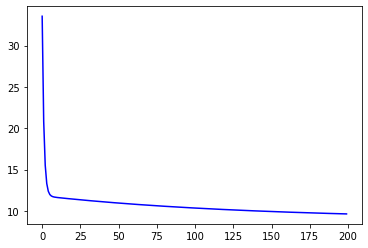

In [96]:
plt.plot(range(epoches), loss_hist, 'b-')

In [66]:
loss_hist

[48.35237113877579,
 37.32582439688577,
 29.627036336394212,
 24.251517470647848,
 20.497985268898635,
 17.876840591917187,
 16.046270679948936,
 14.767639568554323,
 13.874343987573893,
 13.250070162944953,
 12.813613841953964,
 12.508282421139153,
 12.294496060926013,
 12.144622167103153,
 12.039369093344952,
 11.96526841110701,
 11.912917160877068,
 11.875750683043742,
 11.84918587197232,
 11.830023040377103,
 11.816028332007495,
 11.805642183815007,
 11.79777578933904,
 11.791668999985296,
 11.786791119058547,
 11.78277164129493,
 11.779351898790797,
 11.77635130269486,
 11.773643774906166,
 11.77114129390642,
 11.768782407312333,
 11.766524211934776,
 11.764336754671355,
 11.762199123499736,
 11.760096718411624,
 11.758019346120172,
 11.755959889883469,
 11.753913380844125,
 11.751876349686674,
 11.74984637399845,
 11.747821762260264,
 11.74580133322515,
 11.74378426189198,
 11.741769971972262,
 11.739758060816035,
 11.737748246998937,
 11.735740333730323,
 11.733734183306618,
 11

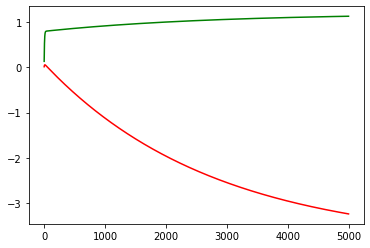

In [61]:
plt.plot(range(epoches), w_hist, 'g-')
plt.plot(range(epoches), b_hist, 'r-')

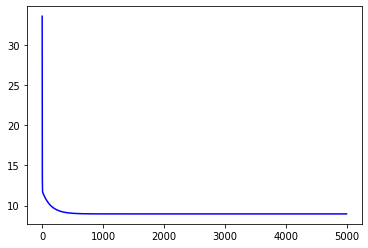

In [63]:
plt.plot(range(epoches), loss_hist, 'b-')

In [ ]:
plt.plot(range(epoches), w_hist, 'g-')
plt.plot(range(epoches), b_hist, 'r-')

In [67]:
target_loss = 11.5 


epoch:  0 loss: 62.43883331014798
w, b:  0.013065769949111345 0.0011678270103092781
---
End of training!
epoch:  0 loss: 55.895239493649754
w, b:  0.06532884974555672 0.00583913505154639
---
End of training!
epoch:  0 loss: 48.35237113877579
w, b:  0.13065769949111344 0.01167827010309278
---
End of training!
epoch:  0 loss: 35.38871414819083
w, b:  0.2613153989822269 0.02335654020618556
---
End of training!
epoch:  0 loss: 33.53928474333497
w, b:  1.3065769949111345 0.1167827010309278
---
End of training!


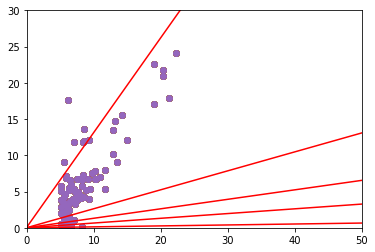

In [97]:
# select inital parameters and train the model 
w = 0.0
b = 0.0 
alpha = 0.001 
epoches = 50

loss_hist_alpha =[]
for alpha in [0.0001, 0.0005, 0.001, 0.002, 0.01]:
    w = 0.0
    b = 0.0 
    w, b, loss_hist, w_hist, b_hist = gradient_descent(x, y, w, b, alpha, epoches)
    loss_hist_alpha.append(loss_hist)
    print('End of training!')



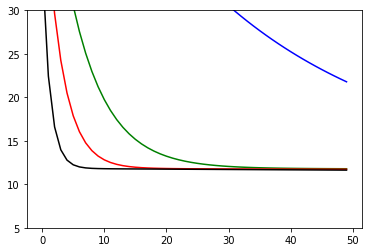

In [98]:
# [0.0001, 0.001, 0.002, 0.005]
plt.plot(range(epoches), loss_hist_alpha[0], 'b-')
plt.ylim(5,30)
plt.plot(range(epoches), loss_hist_alpha[1], 'g-')
plt.plot(range(epoches), loss_hist_alpha[2], 'r-')
plt.plot(range(epoches), loss_hist_alpha[3], 'k-')
# loss_hist_alpha

### EXERCISES

1/ Improve the Gradient descent function: store history of loss. 

2/ Plot the loss against the epoches. 

3/ Store the history of w and b paramseters.  

4/ Plot w and b against the epochos  

5/ Evaluate the plots 

6/ What number of epoches is suitable for this task? 

7/ Change manualy alpha (learning rate). Identify suitable number. 

8/ Create a procedure to find optimal learning rate (systematicaly). 